In [186]:
import cv2
import numpy as np
import os
from sklearn.svm import LinearSVC
from sklearn.externals import joblib
from scipy.cluster.vq import *
from sklearn.preprocessing import StandardScaler
import glob
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import mahotas
import mahotas.features
import milk
from jug import TaskGenerator
from skimage import data
from skimage.feature import hog
from skimage import data, color, exposure
import helper
%matplotlib inline

In [183]:
%load_ext autoreload
%autoreload 2

In [9]:
ls data

 Volume in drive E is Data
 Volume Serial Number is 02AA-5720

 Directory of E:\metis\metis_mcnulty\data

08/01/2015  10:21 AM    <DIR>          .
08/01/2015  10:21 AM    <DIR>          ..
08/01/2015  10:19 AM         3,188,904 sampleSubmission.csv
08/01/2015  10:21 AM       639,374,249 test.7z
08/01/2015  10:19 AM       109,723,070 train.7z
08/01/2015  10:19 AM           588,903 trainLabels.csv
               4 File(s)    752,875,126 bytes
               2 Dir(s)  346,856,423,424 bytes free


In [10]:
!ls 'data/train'

ls: cannot access data/train: No such file or directory


In [11]:
?pd.read_csv

In [12]:
train_labels = pd.read_csv('data/trainLabels.csv',dtype='object')
train_labels.head()
#train_labels=dict(zip(train_labels.id,train_labels.label))

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [17]:
train_base= 'data/train'
training_data= glob.glob("data/train/*.png")

In [18]:
#train_file_df.columns = ['id','filename','full_filename']
elems=[]
for filename in os.listdir(train_base):
    fileid= filename.replace(".png","") # replace .png
    full_filename = os.path.join(train_base,filename)
    elems.append({'id':fileid, 'filename':filename, 'full_filename':full_filename})
#train_file_df=pd.DataFrame(elems,columns=['id','filename','full_filename']) # give a file name -> ( label, full path)
train_file_df=pd.DataFrame(elems) # give a file name -> ( label, full path)
train_file_df.head()

,filename,full_filename,id
0,1.png,data/train\1.png,1
1,10.png,data/train\10.png,10
2,100.png,data/train\100.png,100
3,1000.png,data/train\1000.png,1000
4,10000.png,data/train\10000.png,10000


In [19]:
train_file_df.dtypes

filename         object
full_filename    object
id               object
dtype: object

In [20]:
all_data=pd.merge(train_labels,train_file_df,on=['id'])
all_data.head()

,id,label,filename,full_filename
0,1,frog,1.png,data/train\1.png
1,2,truck,2.png,data/train\2.png
2,3,truck,3.png,data/train\3.png
3,4,deer,4.png,data/train\4.png
4,5,automobile,5.png,data/train\5.png


In [79]:
sample_image=all_data['full_filename'].ix[54]

In [80]:
img=cv2.imread(sample_image)
img = cv2.cvtColor(img, cv2.cv.CV_BGR2RGB)

(32L, 32L, 3L)


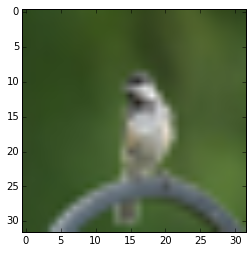

In [82]:
plt.imshow(img)
print (img.shape)

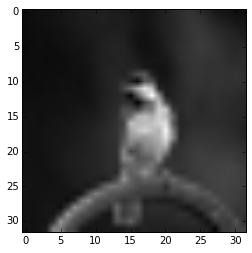

In [83]:
plt.imshow(img[:,:,0],cmap=cm.binary_r)


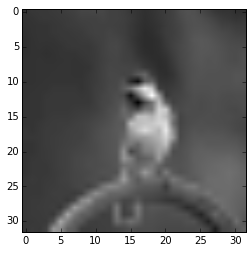

In [84]:
plt.imshow(img[:,:,1],cmap=cm.binary_r)


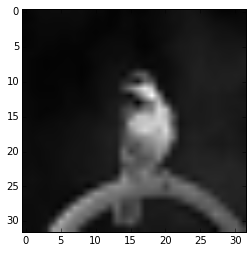

In [85]:
plt.imshow(img[:,:,2],cmap=cm.binary_r)


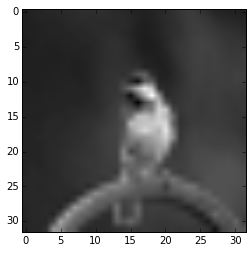

In [86]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap=cm.binary_r)


In [35]:
?cv2.bilateralFilter

## Blur images

http://docs.opencv.org/modules/imgproc/doc/filtering.html?highlight=bilateralfilter#bilateralfilter

- d – Diameter of each pixel neighborhood that is used during filtering
- sigmaColor – Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace ) will be mixed together, resulting in larger areas of semi-equal color.
- sigmaSpace – Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough

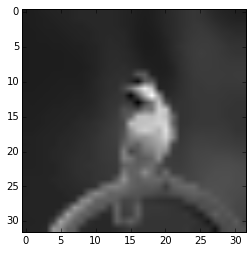

In [87]:
bi_lateral_filter_diameter=5
sigmaColor=10
sigmaSpace = 10
bi_lateral_img=cv2.bilateralFilter(gray_image,bi_lateral_filter_diameter,sigmaColor,sigmaSpace)
plt.imshow(bi_lateral_img,cmap=cm.binary_r)

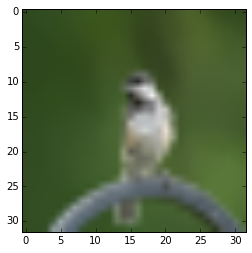

In [137]:
bi_lateral_img_c=cv2.bilateralFilter(img,bi_lateral_filter_diameter,sigmaColor,sigmaSpace)
plt.imshow(bi_lateral_img_c)

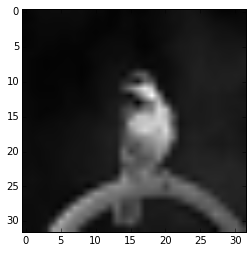

In [88]:
plt.imshow(img[:,:,2],cmap=cm.binary_r)

In [89]:
mahotas.features.haralick(img[:,:,0])

array([[  2.60806208e-03,   3.35568548e+02,   8.22072796e-01,
          9.42993935e+02,   2.75731788e-01,   1.47508065e+02,
          3.43640719e+03,   7.00128464e+00,   9.25988239e+00,
          4.43122880e-04,   4.03206117e+00,  -4.94708041e-01,
          9.98862615e-01],
       [  2.51916307e-03,   4.68554631e+02,   7.55735386e-01,
          9.59112789e+02,   2.64500647e-01,   1.48250780e+02,
          3.36789653e+03,   7.01077922e+00,   9.32939839e+00,
          4.06782791e-04,   4.20356541e+00,  -4.86489007e-01,
          9.98756763e-01],
       [  3.75534518e-03,   2.90768145e+02,   8.45513510e-01,
          9.41079523e+02,   3.88957288e-01,   1.47330645e+02,
          3.47354995e+03,   6.99551746e+00,   8.94018981e+00,
          6.31710174e-04,   3.74798383e+00,  -5.45938063e-01,
          9.99392502e-01],
       [  2.36648652e-03,   4.80374610e+02,   7.49618487e-01,
          9.59285300e+02,   2.57948564e-01,   1.48212279e+02,
          3.35676659e+03,   6.99499883e+00,   9.456

In [90]:
?mahotas.features.haralick

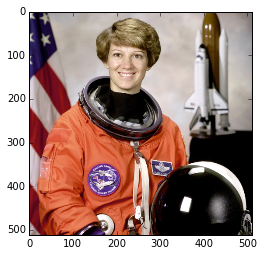

In [91]:
plt.imshow(data.astronaut())

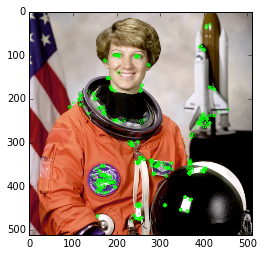

(<matplotlib.image.AxesImage at 0x2106fa58>, None)

In [92]:
img2 = data.astronaut()

# Initiate STAR detector
orb = cv2.ORB()

# find the keypoints with ORB
kp = orb.detect(img2,None)

# compute the descriptors with ORB
kp, des = orb.compute(img2, kp)

# draw only keypoints location,not size and orientation
img3 = cv2.drawKeypoints(img2,kp,color=(0,255,0), flags=0)
plt.imshow(img3),plt.show()

In [93]:
surf = cv2.SURF(400)

# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(gray_image,None)

len(kp)

1

In [94]:
orb = cv2.ORB()

# find the keypoints with ORB
kp = orb.detect(bi_lateral_img,None)

# compute the descriptors with ORB
kp, des = orb.compute(bi_lateral_img, kp)

In [95]:
?cv2.ORB

In [96]:
len(kp)

0

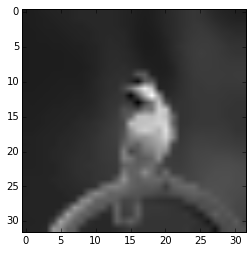

In [102]:
from skimage import transform as tf
from skimage.feature import CENSURE


detector = CENSURE(mode='Octagon')


plt.gray()

detector.detect(gray_image)

plt.imshow(bi_lateral_img)
plt.scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
              2 ** detector.scales, facecolors='none', edgecolors='r')


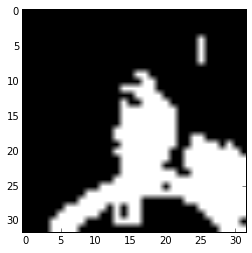

In [197]:
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
radius = 15
selem = disk(radius)
local_otsu = rank.otsu(gray_image, selem)
threshold_global_otsu = threshold_otsu(img)
global_otsu = gray_image >= threshold_global_otsu
plt.imshow(global_otsu)

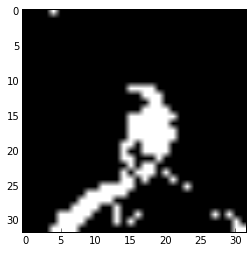

In [198]:
plt.imshow(gray_image >= local_otsu )

In [223]:
gray_image

array([[ 56,  58,  60, ...,  57,  55,  56],
       [ 55,  57,  59, ...,  61,  59,  59],
       [ 55,  56,  57, ...,  66,  64,  63],
       ..., 
       [ 60,  62,  62, ..., 110,  90,  84],
       [ 60,  61,  62, ...,  95, 113,  81],
       [ 60,  61,  61, ...,  93, 101,  99]], dtype=uint8)

In [227]:
gray_image >= local_otsu

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True,  True]], dtype=bool)

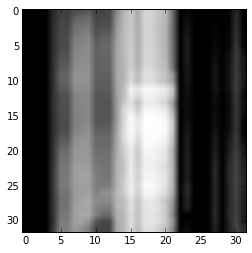

In [238]:
plt.imshow(exposure.equalize_hist(gray_image.dot((gray_image >= local_otsu).astype(int))))

In [234]:
img_res=cv2.bitwise_and(gray_image.copy(),gray_image.copy(),mask = (gray_image >= local_otsu).astype(int))
plt.imshow(img_res)

error: ..\..\..\..\opencv\modules\core\src\arithm.cpp:1035: error: (-215) (mask.type() == CV_8UC1 || mask.type() == CV_8SC1) in function cv::binary_op


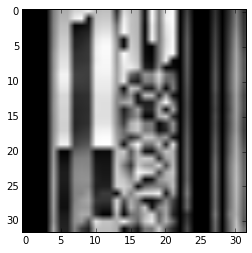

In [217]:
plt.imshow(exposure.equalize_hist(gray_image.dot(gray_image >= local_otsu)))

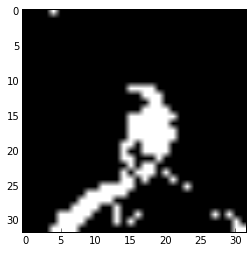

In [210]:
plt.imshow(gray_image >= local_otsu)

In [203]:
gray_image[global_otsu]

array([ 84,  85,  84,  84, 102, 110, 108, 108,  98, 128, 176, 223, 195,
       106, 175, 244, 152,  84,  89, 125, 188, 100, 104,  96,  91, 128,
       131, 207, 195,  86, 102, 121, 187, 191, 177, 204, 185, 120,  93,
       185, 186, 193, 196, 205, 209, 110,  85,  99, 156, 189, 210, 194,
       177, 223, 138,  84, 105, 136, 149, 154, 165, 179, 203, 148,  85,
        84, 117, 121, 109, 139, 149, 165, 180,  97,  86,  86,  85,  84,
        84,  84, 142,  84, 102, 128, 132, 160, 141,  84,  88,  90,  89,
        88,  88,  88,  86, 142, 130, 101, 104, 114, 151,  89,  84,  90,
        91,  92,  93,  93,  94,  91,  86, 110, 115, 109, 116, 126, 101,
        85,  89,  92,  93,  95,  96,  97,  95,  90, 136, 106, 119, 150,
       124,  93, 124,  86,  89,  92,  95,  96,  97,  98,  96,  93, 104,
       157, 118, 104, 123, 119, 119, 105, 126, 110,  92,  84,  90,  97,
        98,  98,  97,  96,  94, 117, 140, 140, 129, 119, 107, 105, 107,
       103, 111, 117, 127, 123,  98,  95,  97,  97,  96,  95,  9

TypeError: Invalid dimensions for image data

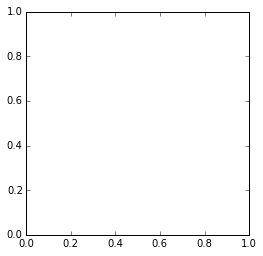

In [204]:
plt.imshow(gray_image[global_otsu],cmap=plt.cm.gray)

In [99]:
?CENSURE

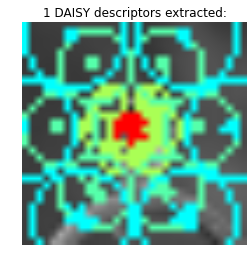

In [167]:
from skimage.feature import daisy
from skimage import data
import matplotlib.pyplot as plt


descs, descs_img = daisy(gray_image,  histograms=6,
                         orientations=8, visualize=True)

fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(descs_img)
descs_num = descs.shape[0] * descs.shape[1]
ax.set_title('%i DAISY descriptors extracted:' % descs_num)
plt.show()

In [169]:
newarr,hog_image=hog(gray_image,visualise=True)

In [170]:
len(newarr)

324

In [171]:
gray_image.shape

(32L, 32L)

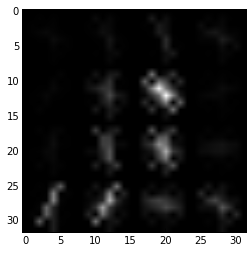

In [172]:
plt.imshow(hog_image)

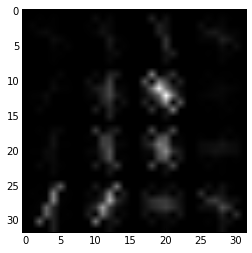

In [180]:
newarr,hog_image=hog(bi_lateral_img,visualise=True,normalise=True)
plt.imshow(hog_image)

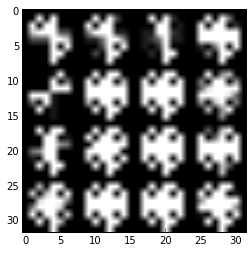

In [179]:
newarr,hog_imag=hog(bi_lateral_img,visualise=True,normalise=True)
hog_imag =exposure.rescale_intensity(hog_image, in_range=(0, 0.02))
plt.imshow(hog_imag)

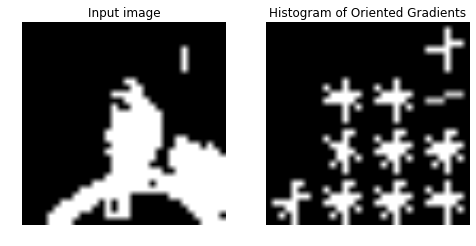

In [181]:
fd, hog_image = hog(global_otsu,  visualise=True,normalise=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.axis('off')
ax1.imshow(global_otsu, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [193]:
z=helper.GrayScaleImageTransform().transform([img])

In [194]:
list(z)

[array([[ 56,  58,  60, ...,  57,  55,  56],
        [ 55,  57,  59, ...,  61,  59,  59],
        [ 55,  56,  57, ...,  66,  64,  63],
        ..., 
        [ 60,  62,  62, ..., 110,  90,  84],
        [ 60,  61,  62, ...,  95, 113,  81],
        [ 60,  61,  61, ...,  93, 101,  99]], dtype=uint8)]

In [195]:
z[0]

TypeError: 'generator' object has no attribute '__getitem__'